# Cube de données W43-MM1 N2H+ 12M isolated contsub crop

In [1]:
%pylab inline
from pywavan import fbm2d, powspec, fan_trans
from astropy.io import fits
import aplpy
from pywavan import subfits
from pywavan import nb_scale

Populating the interactive namespace from numpy and matplotlib


In [2]:
HDU = fits.open("/user/workdir/soldanof/ALMA/W43-MM1/W43-MM1_B3_spw0_12M_n2hp.image-isolated-contsub-crop.fits")
cube = HDU[0].data
header = HDU[0].header

In [3]:
cube.shape

(57, 2240, 2240)

INFO: Auto-setting vmin to -1.064e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.825e-02 [aplpy.core]


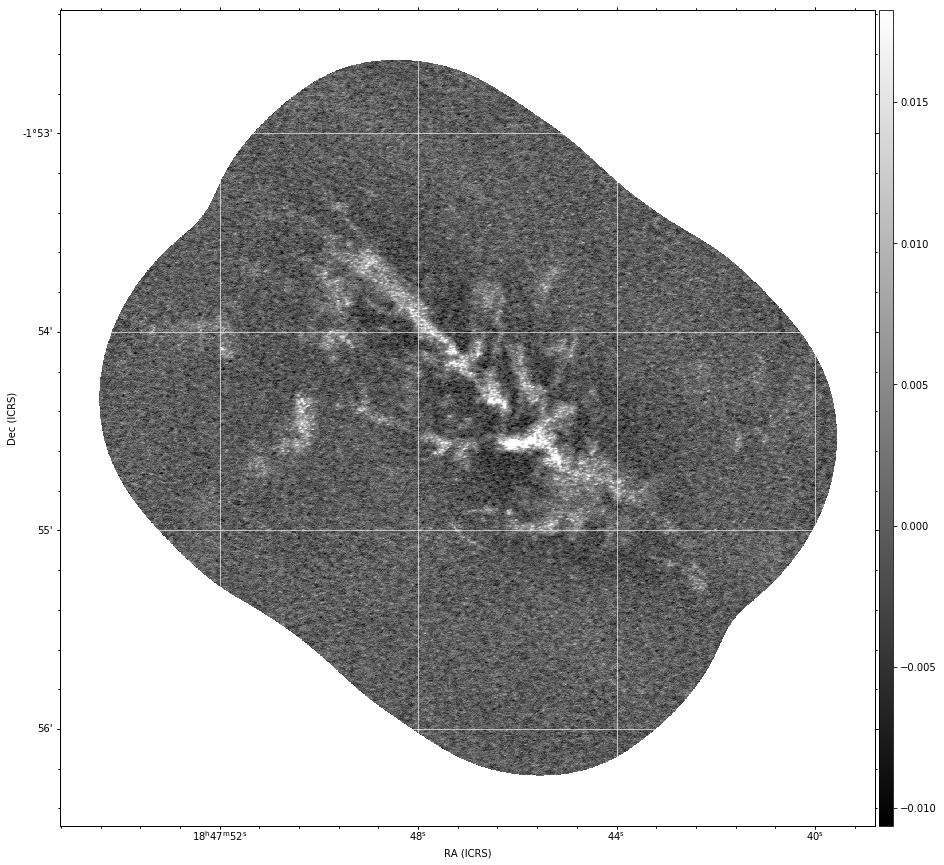

In [5]:
fig_all = plt.figure(1, figsize=(15,15))
fig = aplpy.FITSFigure("/user/workdir/soldanof/ALMA/W43-MM1/W43-MM1_B3_spw0_12M_n2hp.image-isolated-contsub-crop.fits",figure=fig_all,slices=[35])
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.add_grid()

***
# Cut du cube d'origine

In [7]:
input1 = '/user/workdir/soldanof/ALMA/W43-MM1/W43-MM1_B3_spw0_12M_n2hp.image-isolated-contsub-crop.fits'
output = '/user/workdir/soldanof/ALMA/W43-MM1/W43-MM1_B3_spw0_12M_n2hp.image-isolated-contsub-crop_cut.fits'
coord = np.array([507,809,9,1732,1506,56])
subfits(input1,output,coord)

Dimensions 1226 698 48


In [8]:
HDU = fits.open("/user/workdir/soldanof/ALMA/W43-MM1/W43-MM1_B3_spw0_12M_n2hp.image-isolated-contsub-crop_cut.fits")
cube = HDU[0].data
header = HDU[0].header

INFO: Auto-setting vmin to -9.576e-03 [aplpy.core]
INFO: Auto-setting vmax to  1.354e-02 [aplpy.core]


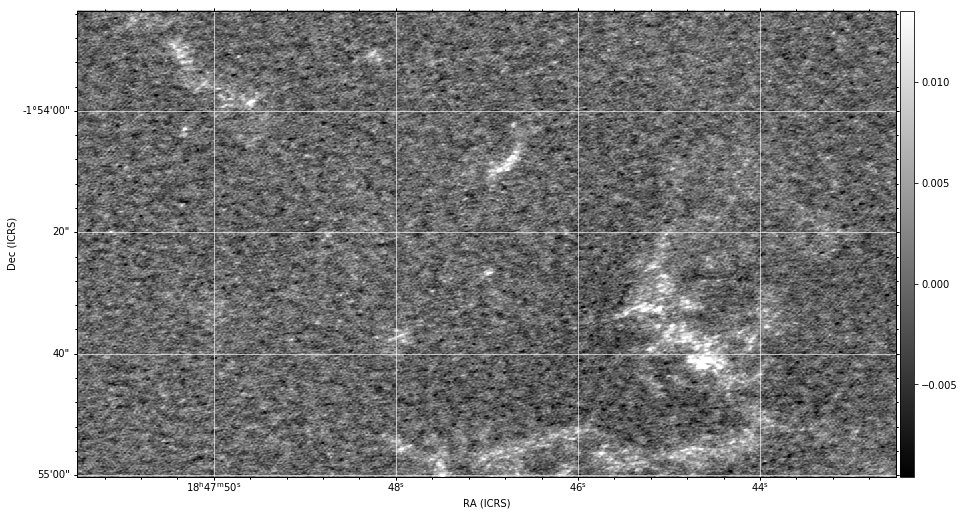

In [9]:
fig_all = plt.figure(1, figsize=(15,15))
fig = aplpy.FITSFigure("/user/workdir/soldanof/ALMA/W43-MM1/W43-MM1_B3_spw0_12M_n2hp.image-isolated-contsub-crop_cut.fits",figure=fig_all,slices=[15])
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.add_grid()

***
# Test de vérification de pywavan 

In [10]:
cube.shape

(48, 698, 1226)

In [11]:
reso = header ['CDELT2']*60
q = []
q= [2.0]*nb_scale(cube.shape)

wt, S11a, wave_k, S1a, q =  fan_trans(cube[23,:,:], reso=reso, angular=False,q=q,apodize = 0.98,arrdim = np.array([1024,1600]))

  0%|          | 0/25 [00:00<?, ?it/s]

1600 1024


100%|██████████| 25/25 [03:03<00:00,  7.34s/it]


In [12]:
M = nb_scale(cube.shape)

coherent = np.sum(wt[M:2*M,:,:],axis=0)
Gaussian = np.sum(wt[2*M:3*M,:,:],axis=0) 

Text(0.5, 1.0, 'coherent')

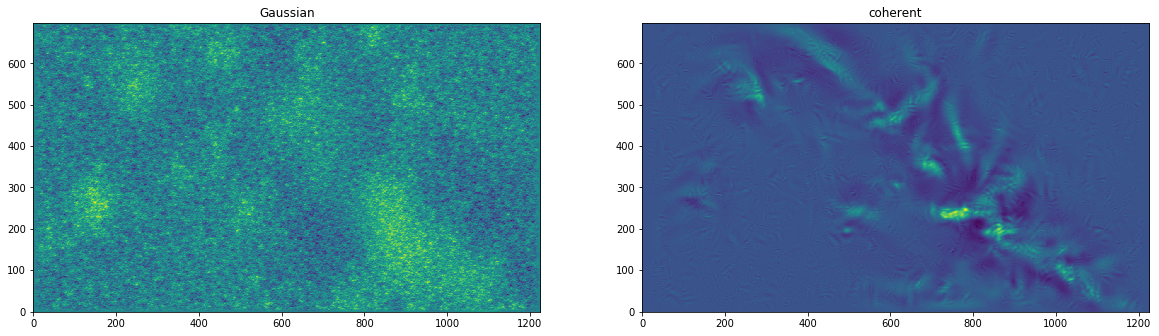

In [13]:
figure(figsize=(20,10))
subplot(1,2,1)
imshow(Gaussian.real,origin="lower")
title('Gaussian')
subplot(1,2,2)
imshow(coherent.real,origin="lower")
title('coherent') 

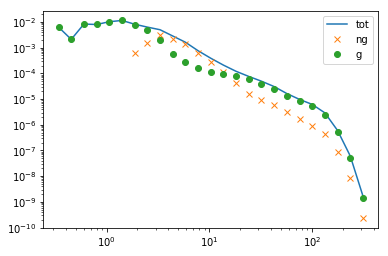

In [14]:
plt.plot(wave_k, S1a[0,:],label="tot")
plt.plot(wave_k, S1a[1,:],"x",label="ng")
plt.plot(wave_k, S1a[2,:],"o",label="g")
plt.xscale("log")
plt.yscale("log")
plt.legend()

***
# Pywavan sur tout le cube

In [20]:
reso = header ['CDELT2']*60
M = nb_scale(cube.shape)
N = header['NAXIS3']

In [ ]:
coherent_tot = []
gaussian_tot = []
s1a_tot_tot = []
s1a_tot_gau = []
s1a_tot_ng = []

for i in range(N) :
    q = []
    q= [2.0]*nb_scale(cube.shape)
    print("data number",i)
    wt, S11a, wave_k, S1a, q =  fan_trans(cube[i,:,:], reso=reso, angular=False,q=q,apodize = 0.98, arrdim = np.array([1024,1600]))

    coherent = np.sum(wt[M:2*M,:,:],axis=0)
    Gaussian = np.sum(wt[2*M:3*M,:,:],axis=0) 
    
    coherent_tot.append( coherent )
    gaussian_tot.append( Gaussian )
    s1a_tot_tot.append( S1a[0,:] )
    s1a_tot_ng.append(S1a[1,:])
    s1a_tot_gau.append(S1a[2,:])

np.save("/user/workdir/soldanof/data/w43_12_iso_cnts/coh.npy", coherent_tot)
np.save("/user/workdir/soldanof/data/w43_12_iso_cnts/gau.npy", gaussian_tot)
np.save("/user/workdir/soldanof/data/w43_12_iso_cnts/s1at.npy",s1a_tot_tot)
np.save("/user/workdir/soldanof/data/w43_12_iso_cnts/s1ag.npy",s1a_tot_gau)
np.save("/user/workdir/soldanof/data/w43_12_iso_cnts/s1ang.npy",s1a_tot_ng)
np.save("/user/workdir/soldanof/data/w43_12_iso_cnts/wave_k.npy",wave_k)

  0%|          | 0/25 [00:00<?, ?it/s]

data number 0
1600 1024


  0%|          | 0/25 [00:00<?, ?it/s]

data number 1
1600 1024


 12%|█▏        | 3/25 [00:11<01:24,  3.83s/it]

Text(0.5, 1.0, 'Coherent')

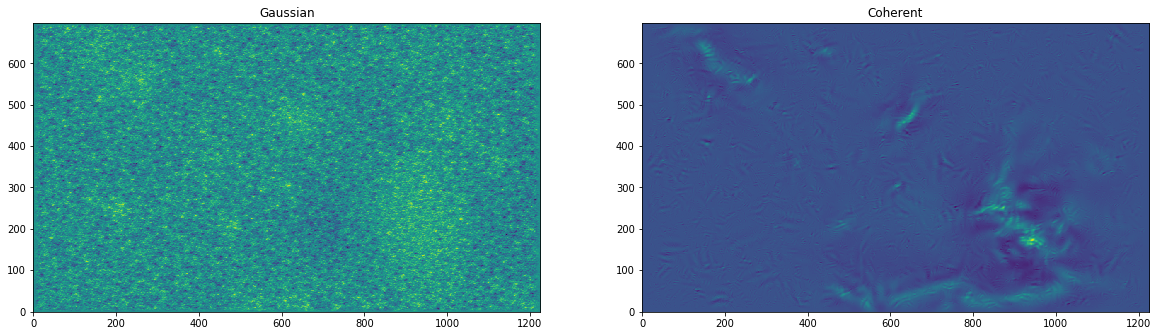

In [22]:
figure(figsize=(20,10))
im_g = np.load("/user/workdir/soldanof/data/w43_12_iso_cnts/gau.npy")
im_ng = np.load("/user/workdir/soldanof/data/w43_12_iso_cnts/coh.npy")

subplot(1,2,1)
imshow(im_g[15].real,origin="lower")
title('Gaussian')

subplot(1,2,2)
imshow(im_ng[15].real,origin="lower")
title('Coherent')

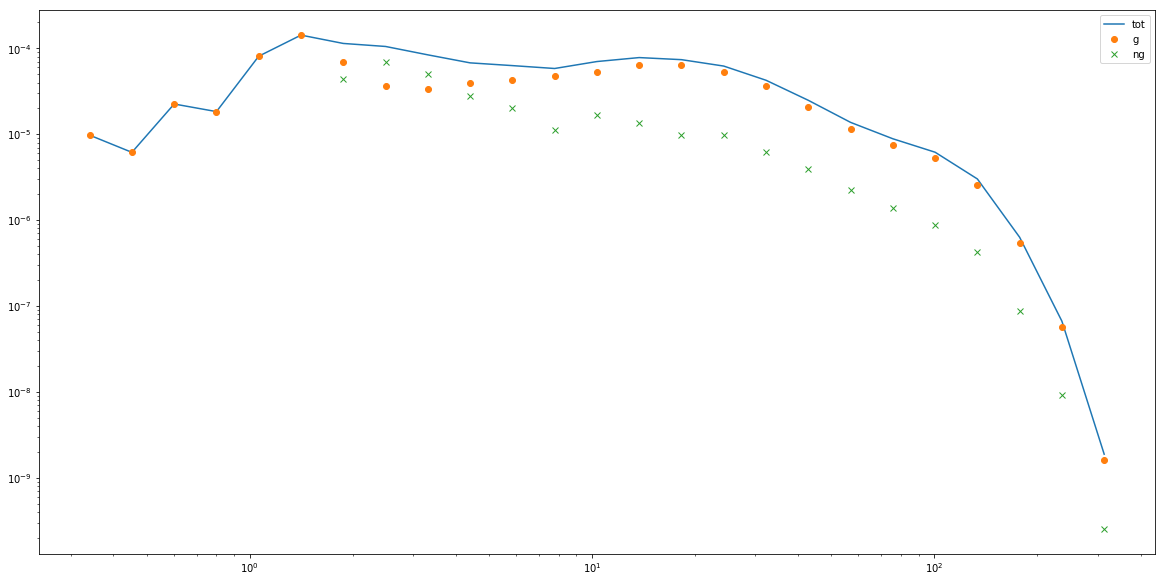

In [23]:
figure(figsize=(20,10))
t = np.load("/user/workdir/soldanof/data/w43_12_iso_cnts/s1at.npy")
g = np.load("/user/workdir/soldanof/data/w43_12_iso_cnts/s1ag.npy")
ng = np.load("/user/workdir/soldanof/data/w43_12_iso_cnts/s1ang.npy")
wk = np.load("/user/workdir/soldanof/data/w43_12_iso_cnts/wave_k.npy")
plt.plot(wk, t[1],label="tot")
plt.plot(wk, g[1],"o",label="g")
plt.plot(wk, ng[1],"x",label="ng")
plt.xscale("log")
plt.yscale("log")
plt.legend()